In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans

## Part 1
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', \
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=True, random_state=42)

labels = dataset.target
true_k = np.unique(labels).shape[0]
print np.unique(labels)
print labels, true_k

## TFxIDF Vectorize
tfidf_vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
x_tfidf = tfidf_vectorizer.fit_transform(dataset.data)
print 'Dimension of the TF-IDF matrix: ', x_tfidf.shape
print 'Part 1) done'

[0 1 2 3 4 5 6 7]
[2 1 2 ... 2 3 4] 8
Dimension of the TF-IDF matrix:  (7882, 27768)
Part 1) done


In [2]:
## Part 2
import itertools
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

data_targets = np.array(labels >= 4, dtype=int)

def plot_contingency_matrix(cm, classes, normalize=False, 
                            title='Contingency Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Contingency matrix')

    print(cm)

    thresh = cm.max() / 2.
    if normalize:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            # plt.text(j, i, cm[i, j],
            plt.text(j, i, "%.2f"%cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            # plt.text(j, i, "%.2f"%cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Initial KMeans 
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30)
print("KMeans Clustering Modeling...")
print("-- Clustering data with %s" % km)
km.fit(x_tfidf)
cm = confusion_matrix(data_targets, km.labels_)
class_names = ['Computer Tech', 'Recreational Activity']
plot_contingency_matrix(cm, classes=class_names)

## Clustering Measures
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(data_targets, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(data_targets, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(data_targets, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(data_targets, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(data_targets, km.labels_))
print 'Part 2) done'

KMeans Clustering Modeling...
-- Clustering data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
Contingency matrix
[[   4 3899]
 [1717 2262]]
-- Finish Plotting...
-- Homogeneity: 0.253
-- Completeness: 0.335
-- V-measure: 0.288
-- Adjusted Rand-Index: 0.181
-- Adjusted Mutual Info Score: 0.253


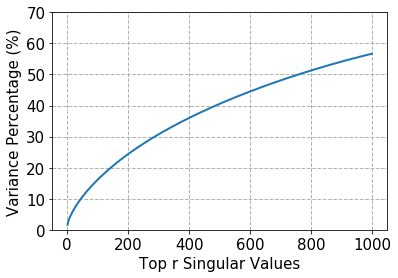

In [3]:
# 3)
# i
from sklearn.decomposition import TruncatedSVD

## SVD dimension=1000
x_tfidf_T = x_tfidf.transpose()
x_var = np.trace(x_tfidf.dot(x_tfidf_T).A)
svd = TruncatedSVD(n_components=1000)
x_lsi = svd.fit_transform(x_tfidf)
dims = xrange(1,1001)
sv_var_ratio = []
pre_var = 0

## Compute Accumulative Variance Percentage
for r in dims:
    sv_var = svd.singular_values_[r-1] ** 2
    pre_var += sv_var
    sv_var_ratio.append(pre_var / x_var)

fig, ax = plt.subplots()
ax.plot(dims, np.multiply(sv_var_ratio, 100), lw=2)
ax.grid(color='0.7', linestyle='--', linewidth=1)
ax.set_ylim([0, 70])
ax.set_xlabel('Top r Singular Values',fontsize=15)
ax.set_ylabel('Variance Percentage (%)',fontsize=15)
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)
plt.show()
print 'Part 3-i) done'

Contingency matrix
[[1717 2186]
 [1674 2305]]


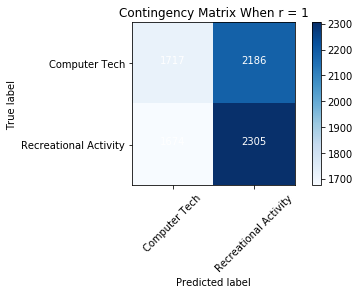

Contingency matrix
[[3707  196]
 [ 466 3513]]


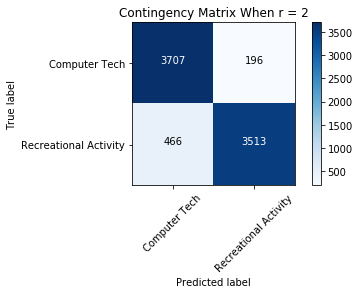

Contingency matrix
[[  41 3862]
 [2633 1346]]


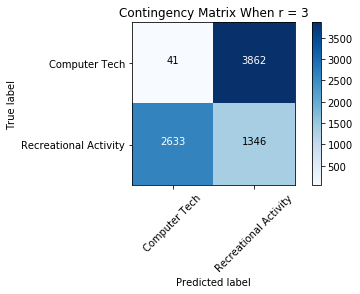

Contingency matrix
[[   5 3898]
 [1545 2434]]


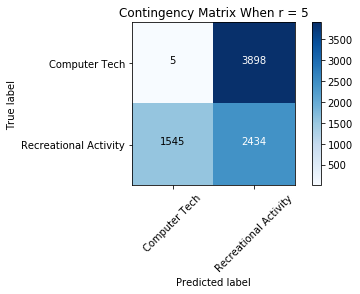

Contingency matrix
[[3900    3]
 [2379 1600]]


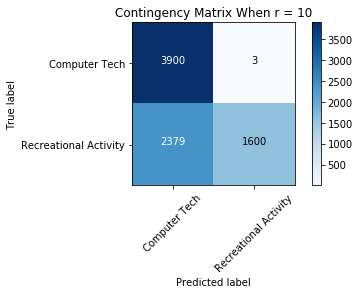

Contingency matrix
[[   3 3900]
 [1611 2368]]


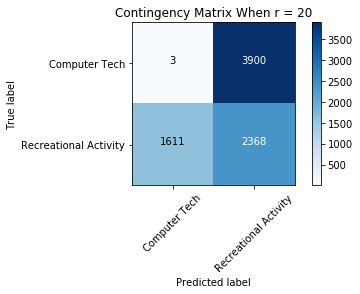

Contingency matrix
[[   4 3899]
 [1641 2338]]


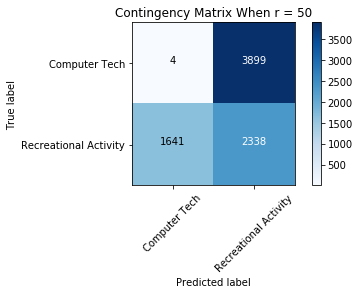

Contingency matrix
[[   3 3900]
 [1654 2325]]


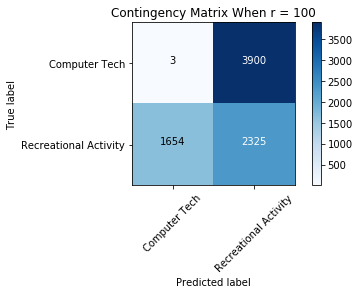

Contingency matrix
[[   3 3900]
 [1643 2336]]


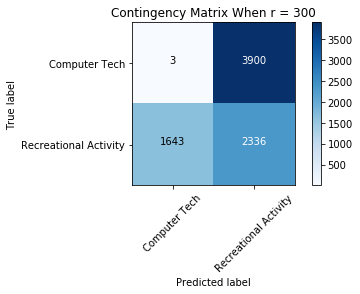

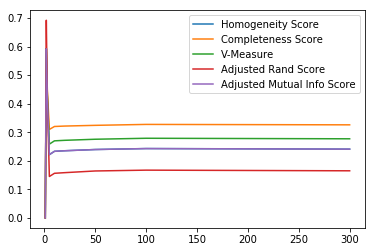

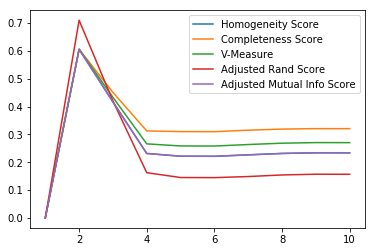


--Homogenity Scores:  [0.00027136487448353535, 0.6052567876343313, 0.4164457136347125, 0.2314855941609781, 0.22169446004255983, 0.22134571730585592, 0.22650374244011012, 0.2316119379420416, 0.23391481037641562, 0.23373737858524227]

--Completeness Scores:  [0.0002752548476941681, 0.6056280808429736, 0.4506183461160515, 0.3123988615912512, 0.30996400619493775, 0.3096996360878299, 0.3151055170263669, 0.3189504703852138, 0.32068405497161595, 0.32055047887017535]

--V-Measure:  [0.00027329601975550286, 0.6054423773138985, 0.4328586258762355, 0.26592352594687124, 0.25850167861455114, 0.25817263124945866, 0.2635574544656232, 0.2683537249769331, 0.27051173233956144, 0.27034555286604023]

--Adjusted Rand Scores:  [0.00029625921510824496, 0.7096443654633022, 0.4199087300516852, 0.1624712568856801, 0.14515583921549685, 0.14476924314919454, 0.14865842190703593, 0.1543891868435953, 0.15699331100274733, 0.1567922209999128]

--Adjusted Mutual Info Scores:  [0.00017983897460787507, 0.605220648774738

In [4]:
# 3)
# ii

## SVD (LSI)
dims = np.array([1,2,3,5,10,20,50,100,300])
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30)
    km.fit(x_lsi[:, 0 : r])
    cm = confusion_matrix(data_targets, km.labels_)
    title = 'Contingency Matrix When r = %i' %r
    plot_contingency_matrix(cm, classes=class_names, title=title)
    plt.show()
    homo_score.append(homogeneity_score(data_targets, km.labels_))
    comp_score.append(completeness_score(data_targets, km.labels_))
    v_score.append(v_measure_score(data_targets, km.labels_))
    ar_score.append(adjusted_rand_score(data_targets, km.labels_))
    ami_score.append(adjusted_mutual_info_score(data_targets, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()

## SVD (1~10) Zoom Up
dims = xrange(1, 11)
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30)
    km.fit(x_lsi[:, 0 : r])
    homo_score.append(homogeneity_score(data_targets, km.labels_))
    comp_score.append(completeness_score(data_targets, km.labels_))
    v_score.append(v_measure_score(data_targets, km.labels_))
    ar_score.append(adjusted_rand_score(data_targets, km.labels_))
    ami_score.append(adjusted_mutual_info_score(data_targets, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()
print '\n--Homogenity Scores: ', homo_score
print '\n--Completeness Scores: ', comp_score
print '\n--V-Measure: ', v_score
print '\n--Adjusted Rand Scores: ', ar_score
print '\n--Adjusted Mutual Info Scores: ', ami_score

Contingency matrix
[[2189 1714]
 [2311 1668]]


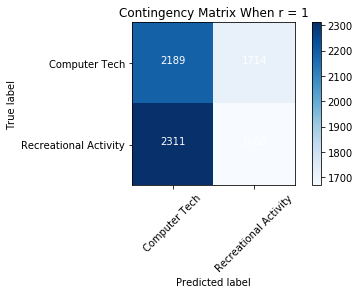

Contingency matrix
[[3594  309]
 [ 158 3821]]


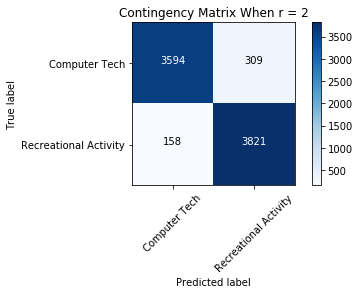

Contingency matrix
[[3899    4]
 [2396 1583]]


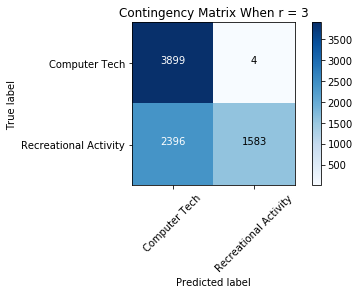

Contingency matrix
[[3898    5]
 [2677 1302]]


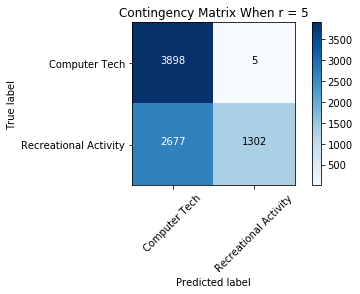

Contingency matrix
[[   4 3899]
 [1347 2632]]


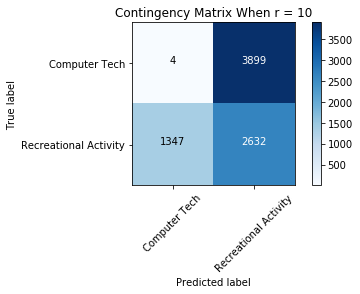

Contingency matrix
[[3898    5]
 [2610 1369]]


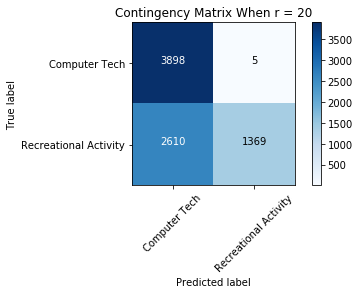

Contingency matrix
[[3895    8]
 [3924   55]]


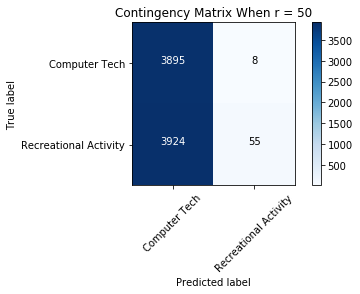

Contingency matrix
[[3893   10]
 [3979    0]]


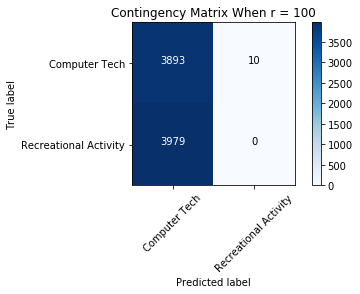

Contingency matrix
[[ 148 3755]
 [   5 3974]]


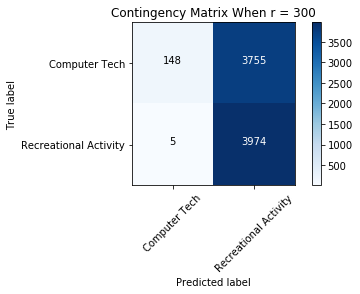

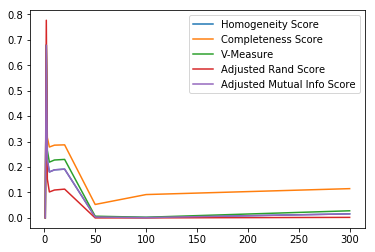

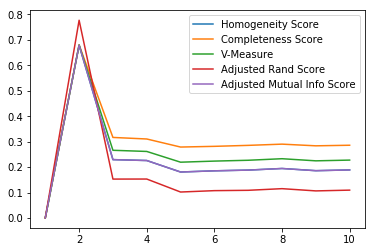


--Homogenity Scores:  [0.00029929908715006716, 0.6790483562300399, 0.22934270331135687, 0.22577911328848171, 0.1806306858119277, 0.18531148009469778, 0.18816445265654863, 0.19448785767431034, 0.18585006076729582, 0.18882721024790378]

--Completeness Scores:  [0.0003040802771981289, 0.680131609210451, 0.3164839569386385, 0.31038172974563294, 0.2787087965375742, 0.28148018337516834, 0.28531173775316465, 0.2901163593456558, 0.28355045037099547, 0.28581581502164793]

--V-Measure:  [0.0003016707390517223, 0.6795895510492934, 0.2659572773735104, 0.2614055563115984, 0.2191989280037279, 0.22348946427551908, 0.22677181264112672, 0.23286676930870479, 0.22453264187655794, 0.22741218187971485]

--Adjusted Rand Scores:  [0.00033909073616188287, 0.7770177788377391, 0.15279745011356483, 0.15299587742767792, 0.10195567187855815, 0.10737607341651813, 0.10871127754388041, 0.11516586951507339, 0.10638015058007572, 0.10938195036167644]

--Adjusted Mutual Info Scores:  [0.000207775691586035, 0.67901897300

In [5]:
## NMF
from sklearn.decomposition import NMF

dims = np.array([1,2,3,5,10,20,50,100,300])
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30)
    nmf = NMF(n_components=r)
    x_nmf = nmf.fit_transform(x_tfidf)
    km.fit(x_nmf)
    cm = confusion_matrix(data_targets, km.labels_)
    title = 'Contingency Matrix When r = %i' %r
    plot_contingency_matrix(cm, classes=class_names, title=title)
    plt.show()
    homo_score.append(homogeneity_score(data_targets, km.labels_))
    comp_score.append(completeness_score(data_targets, km.labels_))
    v_score.append(v_measure_score(data_targets, km.labels_))
    ar_score.append(adjusted_rand_score(data_targets, km.labels_))
    ami_score.append(adjusted_mutual_info_score(data_targets, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()

## NMF (1~10) Zoom Up

dims = xrange(1,11)
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30)
    nmf = NMF(n_components=r)
    x_nmf = nmf.fit_transform(x_tfidf)
    km.fit(x_nmf)
    homo_score.append(homogeneity_score(data_targets, km.labels_))
    comp_score.append(completeness_score(data_targets, km.labels_))
    v_score.append(v_measure_score(data_targets, km.labels_))
    ar_score.append(adjusted_rand_score(data_targets, km.labels_))
    ami_score.append(adjusted_mutual_info_score(data_targets, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()
print '\n--Homogenity Scores: ', homo_score
print '\n--Completeness Scores: ', comp_score
print '\n--V-Measure: ', v_score
print '\n--Adjusted Rand Scores: ', ar_score
print '\n--Adjusted Mutual Info Scores: ', ami_score
print 'Part 3-ii) done'

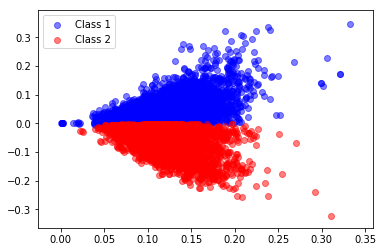

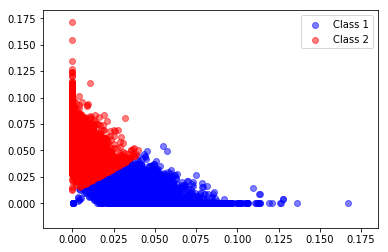

In [6]:
# 4a)

def plot_clusters(data, km):
    x_class1 = data[km.labels_==0,0]
    y_class1 = data[km.labels_==0,1]
    x_class2 = data[km.labels_==1,0]
    y_class2 = data[km.labels_==1,1]
    plt.scatter(x_class1, y_class1, c='b', alpha=0.5, label='Class 1')
    plt.scatter(x_class2, y_class2, c='r', alpha=0.5, label='Class 2')
    plt.legend()
    plt.show()
## SVD (LSI)
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
data_lsi = x_lsi[:, 0:2]
km.fit(data_lsi) 
plot_clusters(data_lsi, km)

## NMF
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=2)
data_nmf = nmf.fit_transform(x_tfidf)
km.fit(data_nmf)
plot_clusters(data_nmf, km)
print 'Part 4-a) done'

Contingency matrix
[[1708 2195]
 [3737  242]]


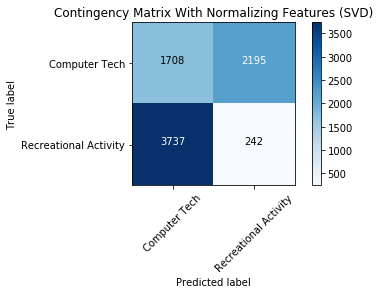

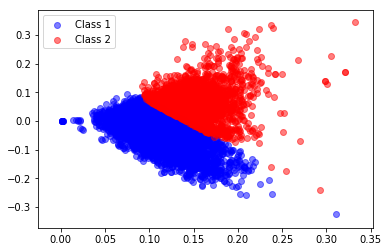

-- Finish Plotting...
-- Homogeneity: 0.236
-- Completeness: 0.264
-- V-measure: 0.249
-- Adjusted Rand-Index: 0.255
-- Adjusted Mutual Info Score: 0.236
Contingency matrix
[[3534  369]
 [ 106 3873]]


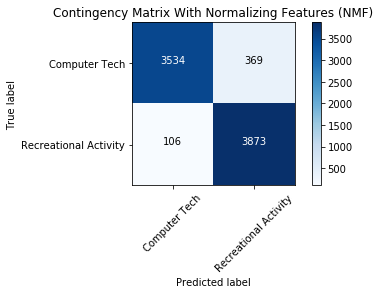

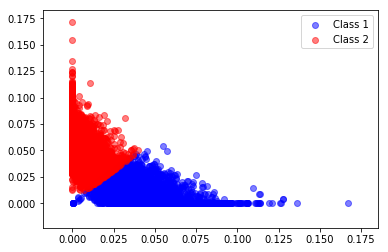

-- Finish Plotting...
-- Homogeneity: 0.683
-- Completeness: 0.686
-- V-measure: 0.684
-- Adjusted Rand-Index: 0.773
-- Adjusted Mutual Info Score: 0.683


In [7]:
# 4b)
# Method 1

def normalizer(features):
    d, n = features.shape
    norm_f = np.empty((d, 0))
    for f in np.transpose(features):
        mean = np.sum(f) / d
        var = 0
        for example in f:
            var += (example - mean) ** 2
        new_f = np.divide(f, np.sqrt(var)).reshape(d,1)
        norm_f = np.append(norm_f, new_f, axis=1)
    return norm_f

# SVD (LSI)

km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
norm_lsi = normalizer(data_lsi)
km.fit(norm_lsi)
cm = confusion_matrix(data_targets, km.labels_)
title = 'Contingency Matrix With Normalizing Features (SVD)'
plot_contingency_matrix(cm, classes=class_names, title=title)
plt.show()
plot_clusters(data_lsi, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(data_targets, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(data_targets, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(data_targets, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(data_targets, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(data_targets, km.labels_))

# NMF
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=2)
data_nmf = nmf.fit_transform(x_tfidf)
norm_nmf = normalizer(data_nmf)
km.fit(norm_nmf) 
cm = confusion_matrix(data_targets, km.labels_)
title = 'Contingency Matrix With Normalizing Features (NMF)'
plot_contingency_matrix(cm, classes=class_names, title=title)
plt.show()
plot_clusters(data_nmf, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(data_targets, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(data_targets, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(data_targets, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(data_targets, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(data_targets, km.labels_))

Contingency matrix
[[3578  325]
 [ 152 3827]]


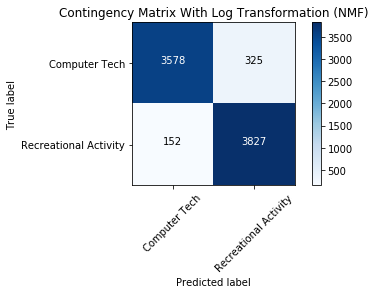

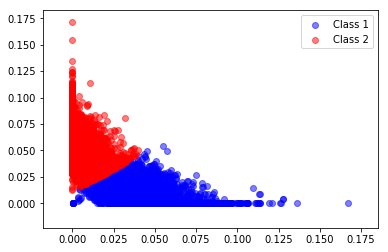

-- Finish Plotting...
-- Homogeneity: 0.675
-- Completeness: 0.676
-- V-measure: 0.676
-- Adjusted Rand-Index: 0.773
-- Adjusted Mutual Info Score: 0.675


In [8]:
# Method 2
from sklearn.preprocessing import FunctionTransformer
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=2)
data_nmf = nmf.fit_transform(x_tfidf)
log = FunctionTransformer(np.log1p)
log_nmf = log.transform(data_nmf)
km.fit(log_nmf)
cm = confusion_matrix(data_targets, km.labels_)
title = 'Contingency Matrix With Log Transformation (NMF)'
plot_contingency_matrix(cm, classes=class_names, title=title)
plt.show()
plot_clusters(data_nmf, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(data_targets, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(data_targets, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(data_targets, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(data_targets, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(data_targets, km.labels_))

Contingency matrix
[[3534  369]
 [ 106 3873]]


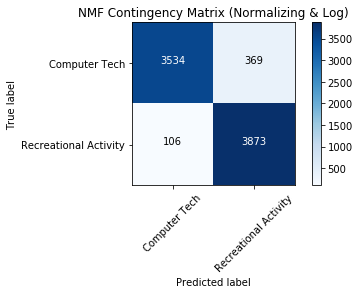

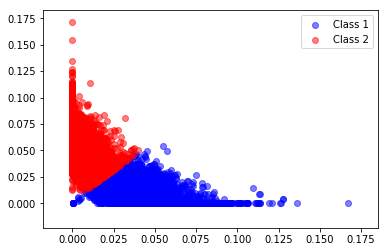

-- Finish Plotting...
-- Homogeneity: 0.683
-- Completeness: 0.686
-- V-measure: 0.684
-- Adjusted Rand-Index: 0.773
-- Adjusted Mutual Info Score: 0.683
Contingency matrix
[[3534  369]
 [ 106 3873]]


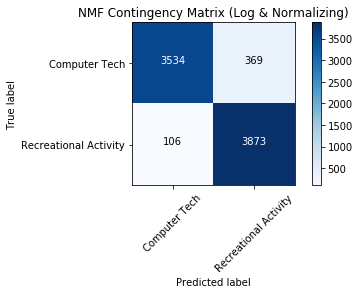

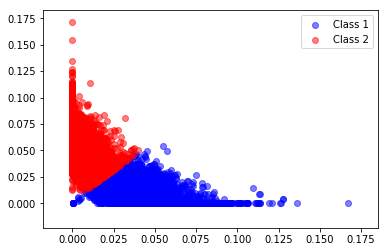

-- Finish Plotting...
-- Homogeneity: 0.683
-- Completeness: 0.686
-- V-measure: 0.684
-- Adjusted Rand-Index: 0.773
-- Adjusted Mutual Info Score: 0.683


In [9]:
# Method 3

## Normalize --> Log
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=2)
data_nmf = nmf.fit_transform(x_tfidf)
norm_nmf = normalizer(data_nmf)
norm_log_nmf = log.transform(norm_nmf)
km.fit(norm_log_nmf) 
cm = confusion_matrix(data_targets, km.labels_)
title = 'NMF Contingency Matrix (Normalizing & Log)'
plot_contingency_matrix(cm, classes=class_names, title=title)
plt.show()
plot_clusters(data_nmf, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(data_targets, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(data_targets, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(data_targets, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(data_targets, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(data_targets, km.labels_))

## Log --> Normalize
km = KMeans(n_clusters = 2, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=2)
data_nmf = nmf.fit_transform(x_tfidf)
log_nmf = log.transform(data_nmf)
log_norm_nmf = normalizer(log_nmf)
km.fit(log_norm_nmf)
cm = confusion_matrix(data_targets, km.labels_)
title = 'NMF Contingency Matrix (Log & Normalizing)'
plot_contingency_matrix(cm, classes=class_names, title=title)
plt.show()
plot_clusters(data_nmf, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(data_targets, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(data_targets, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(data_targets, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(data_targets, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(data_targets, km.labels_))
print 'Part 4-b) done'

In [10]:
## Part 5
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

labels = dataset.target
true_k = np.unique(labels).shape[0]
print np.unique(labels)
print labels, true_k

tfidf_vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
x_tfidf = tfidf_vectorizer.fit_transform(dataset.data)
print 'Dimension of the TF-IDF matrix: ', x_tfidf.shape

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[10  3 17 ...  3  1  7] 20
Dimension of the TF-IDF matrix:  (18846, 52295)


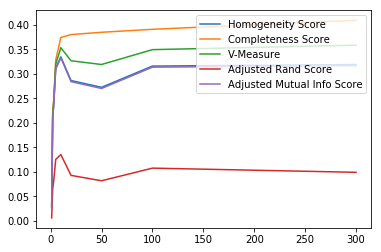

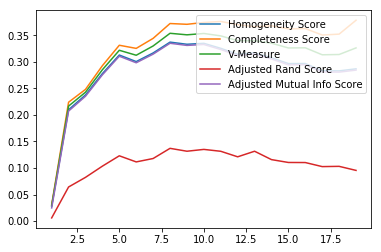


--Homogenity Scores:  [0.02800025097284248, 0.20969464476823385, 0.2374869021932239, 0.2777021329858756, 0.31261486106737646, 0.3003090802554204, 0.3165283314930691, 0.33691142227487914, 0.3329000954439942, 0.3346536994878158, 0.32525735196630234, 0.31398152526784234, 0.3168357550748792, 0.307488519289936, 0.29652453494502584, 0.29665259218178264, 0.2830402837759249, 0.28282526819738485, 0.2866127235477571]

--Completeness Scores:  [0.030970586224342806, 0.22380465485307713, 0.2479662961123379, 0.29261020520099246, 0.33104781788091137, 0.3251467865437101, 0.3439880707981296, 0.37194355945463037, 0.37048603654203244, 0.37392763632457343, 0.3757916053215025, 0.3698451303342954, 0.36593638713027593, 0.3677223350726729, 0.3618857459750342, 0.3623773926804018, 0.3503125414253776, 0.35198348851677447, 0.3781233568537746]

--V-Measure:  [0.029410611355507356, 0.216520015778065, 0.24261349072410512, 0.28496131918199985, 0.3215674016166276, 0.3122347637880781, 0.3296874073847735, 0.35356183380

In [23]:
svd = TruncatedSVD(n_components=1000)
x_lsi = svd.fit_transform(x_tfidf)

## SVD (LSI)
dims = np.array([1,2,3,5,10,20,50,100,300])
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30)
    km.fit(x_lsi[:, 0 : r])
    cm = confusion_matrix(labels, km.labels_)
    '''
    cm = confusion_matrix(labels, km.labels_)
    title = 'Contingency Matrix When r = %i' %r
    plot_contingency_matrix(cm, classes=dataset.target_names, title=title)
    plt.show()
    '''
    homo_score.append(homogeneity_score(labels, km.labels_))
    comp_score.append(completeness_score(labels, km.labels_))
    v_score.append(v_measure_score(labels, km.labels_))
    ar_score.append(adjusted_rand_score(labels, km.labels_))
    ami_score.append(adjusted_mutual_info_score(labels, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()

## SVD (1~20) Zoom Up
dims = xrange(1, 21)
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30)
    km.fit(x_lsi[:, 0 : r])
    homo_score.append(homogeneity_score(labels, km.labels_))
    comp_score.append(completeness_score(labels, km.labels_))
    v_score.append(v_measure_score(labels, km.labels_))
    ar_score.append(adjusted_rand_score(labels, km.labels_))
    ami_score.append(adjusted_mutual_info_score(labels, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()
print '\n--Homogenity Scores: ', homo_score
print '\n--Completeness Scores: ', comp_score
print '\n--V-Measure: ', v_score
print '\n--Adjusted Rand Scores: ', ar_score
print '\n--Adjusted Mutual Info Scores: ', ami_score

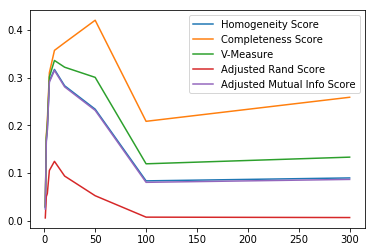

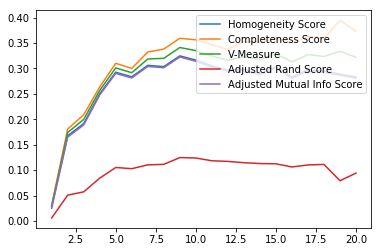


--Homogenity Scores:  [0.027850645337042738, 0.16767380533359325, 0.19145663795997037, 0.25024954449324266, 0.29259996332579646, 0.2836357014630692, 0.30610779621906437, 0.30367998790836986, 0.32480225866790924, 0.31639422054593785, 0.3051094634564706, 0.2969379935168742, 0.29840757107352117, 0.289486635486939, 0.30330655737057044, 0.2829533593885256, 0.2976285885489084, 0.2943228260121597, 0.28901169105842567, 0.2830838839186789]

--Completeness Scores:  [0.030843368194990027, 0.18081735872961502, 0.20891434240247314, 0.26369578413239797, 0.3102147820161366, 0.300182415946751, 0.3323788594932585, 0.3381865351828276, 0.3594355025306104, 0.35644268822227776, 0.3470531588956723, 0.33746857178329576, 0.35241814489785833, 0.35208204282141814, 0.35876899497318826, 0.35022455793499274, 0.36376224923383405, 0.3593135578917889, 0.39493785484345356, 0.37313751331411704]

--V-Measure:  [0.029270709461014465, 0.17399772352945467, 0.19980487887402126, 0.2567967687940138, 0.30115001181517204, 0.29

In [24]:
dims = np.array([1,2,3,5,10,20,50,100,300])
homo_score = []
comp_score = []
v_score = []
ar_score = []
ami_score = []

for r in dims:
    km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30)
    nmf = NMF(n_components=r)
    x_nmf = nmf.fit_transform(x_tfidf)
    km.fit(x_nmf)
    homo_score.append(homogeneity_score(labels, km.labels_))
    comp_score.append(completeness_score(labels, km.labels_))
    v_score.append(v_measure_score(labels, km.labels_))
    ar_score.append(adjusted_rand_score(labels, km.labels_))
    ami_score.append(adjusted_mutual_info_score(labels, km.labels_))

plt.plot(dims, homo_score)
plt.plot(dims, comp_score)
plt.plot(dims, v_score)
plt.plot(dims, ar_score)
plt.plot(dims, ami_score)
plt.legend(['Homogeneity Score', 'Completeness Score', 'V-Measure', 
            'Adjusted Rand Score', 'Adjusted Mutual Info Score'], loc='upper right')
plt.show()

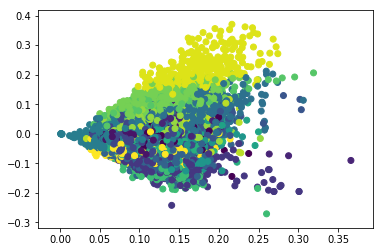

-- Finish Plotting...
-- Homogeneity: 0.334
-- Completeness: 0.374
-- V-measure: 0.353
-- Adjusted Rand-Index: 0.134
-- Adjusted Mutual Info Score: 0.332


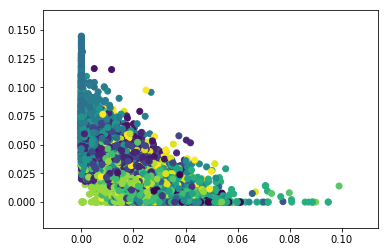

-- Finish Plotting...
-- Homogeneity: 0.321
-- Completeness: 0.357
-- V-measure: 0.338
-- Adjusted Rand-Index: 0.125
-- Adjusted Mutual Info Score: 0.318


In [28]:
## SVD (LSI)
def plot_clusters2(data, km):
    plt.scatter(data[:,0], data[:,1], c=km.labels_)
    plt.show()
km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
data_lsi = x_lsi[:, 0:10]
km.fit(data_lsi)
data_lsi_plt = x_lsi[:, 0:2]
plot_clusters2(data_lsi_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))

## NMF
km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=9)
data_nmf = nmf.fit_transform(x_tfidf)
km.fit(data_nmf)
nmf = NMF(n_components=2)
data_nmf_plt = nmf.fit_transform(x_tfidf)
plot_clusters2(data_nmf_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))

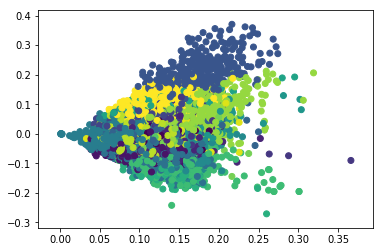

-- Finish Plotting...
-- Homogeneity: 0.315
-- Completeness: 0.362
-- V-measure: 0.337
-- Adjusted Rand-Index: 0.123
-- Adjusted Mutual Info Score: 0.312


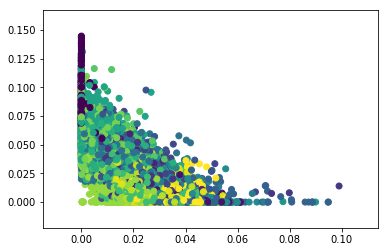

-- Finish Plotting...
-- Homogeneity: 0.308
-- Completeness: 0.337
-- V-measure: 0.322
-- Adjusted Rand-Index: 0.119
-- Adjusted Mutual Info Score: 0.306


In [30]:
# Method 1

# SVD (LSI)

km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
norm_lsi = normalizer(data_lsi)
km.fit(norm_lsi)
plot_clusters2(data_lsi_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))

# NMF
km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=9)
data_nmf = nmf.fit_transform(x_tfidf)
norm_nmf = normalizer(data_nmf)
km.fit(norm_nmf) 
plot_clusters2(data_nmf_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))

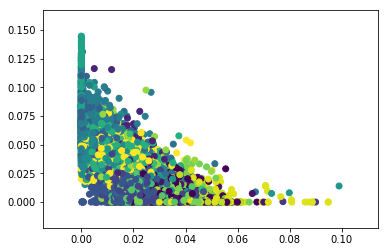

-- Finish Plotting...
-- Homogeneity: 0.327
-- Completeness: 0.360
-- V-measure: 0.343
-- Adjusted Rand-Index: 0.128
-- Adjusted Mutual Info Score: 0.325


In [31]:
# Method 2

km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=9)
data_nmf = nmf.fit_transform(x_tfidf)
log = FunctionTransformer(np.log1p)
log_nmf = log.transform(data_nmf)
km.fit(log_nmf)
plot_clusters2(data_nmf_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))

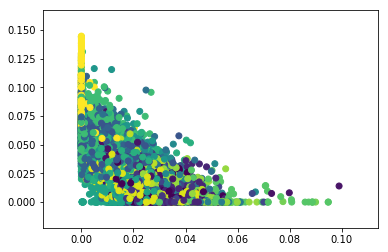

-- Finish Plotting...
-- Homogeneity: 0.309
-- Completeness: 0.337
-- V-measure: 0.323
-- Adjusted Rand-Index: 0.120
-- Adjusted Mutual Info Score: 0.307


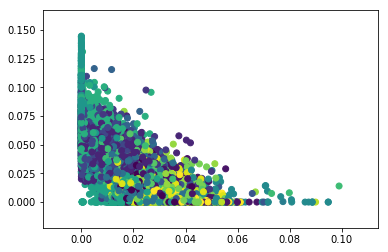

-- Finish Plotting...
-- Homogeneity: 0.307
-- Completeness: 0.340
-- V-measure: 0.323
-- Adjusted Rand-Index: 0.120
-- Adjusted Mutual Info Score: 0.305


In [33]:
# Method 3

## Normalize --> Log
km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=9)
data_nmf = nmf.fit_transform(x_tfidf)
norm_nmf = normalizer(data_nmf)
norm_log_nmf = log.transform(norm_nmf)
km.fit(norm_log_nmf) 
plot_clusters2(data_nmf_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))

## Log --> Normalize
km = KMeans(n_clusters = 20, init='k-means++', max_iter=200, n_init=30, random_state=42)
nmf = NMF(n_components=9)
data_nmf = nmf.fit_transform(x_tfidf)
log_nmf = log.transform(data_nmf)
log_norm_nmf = normalizer(log_nmf)
km.fit(log_norm_nmf)
plot_clusters2(data_nmf_plt, km)
print("-- Finish Plotting...")
print("-- Homogeneity: %0.3f" % homogeneity_score(labels, km.labels_))
print("-- Completeness: %0.3f" % completeness_score(labels, km.labels_))
print("-- V-measure: %0.3f" % v_measure_score(labels, km.labels_))
print("-- Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, km.labels_))
print("-- Adjusted Mutual Info Score: %.3f"
      % adjusted_mutual_info_score(labels, km.labels_))
print 'Part 5) done'